# Direction fields

In [1]:
t, w, x, y, n = var('t w x y n')
palette = [(215/255, 0/255, 132/255), (255/255, 1/255, 73/255), (255/255, 121/255, 1/255), (255/255, 210/255, 0/255)]
cool_palette = [(0/255, 150/255, 173/255), (0/255, 200/255, 146/255)]

## Filling a water tank

### Scenario

You're pumping water into the bottom of a cylindrical tank. You want to know $y(t)$, the water level after $t$ seconds of pumping. The tank starts out empty. The pump pushes water into the tank with a constant pressure. As the water level rises, the pressure working against the pump grows proportionally.

### Example model

Let's suppose the flow rate is proportional to the pressure difference between the tank and the pump. (This assumption is based on the "Hagen–Poiseuille law," which describes flow through a long, narrow pipe.) If the pump pressure is $100$ (in kilopascals), the tank pressure is $10y$ (in kilopascals per meter), and the constant of proportionality is $\tfrac{1}{500}$ (in meters per minute per kilopascal), the flow rate is related to the amount of water in the tank by the equation

$$y' = \tfrac{1}{500}(100 - 10y).$$

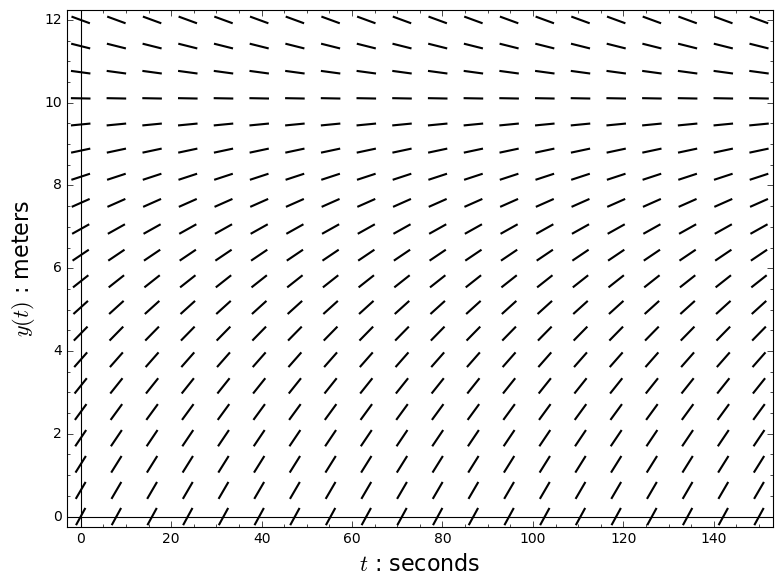

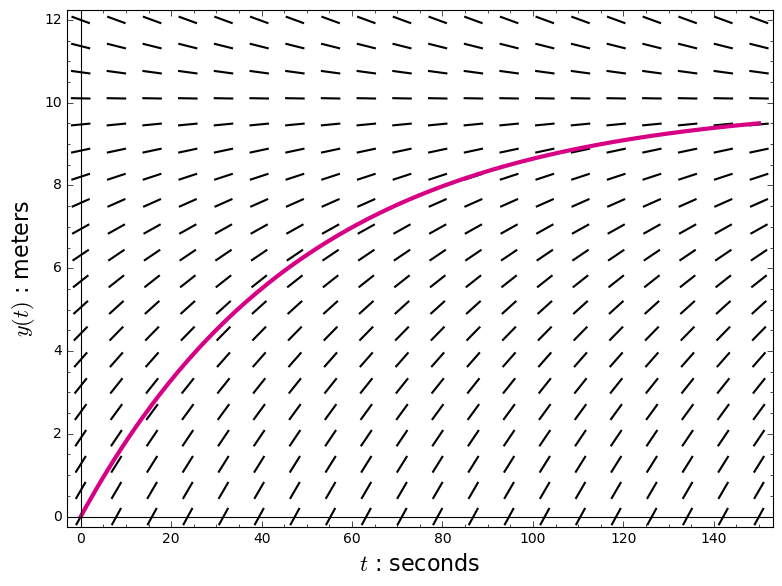

In [122]:
water_direction = plot_slope_field((1/500) * (100 - 10*y), (t, 0, 150), (y, 0, 12))
water_solutions = [plot(exp(-t/50) * 4*k + 10 * (1 - exp(-t/50)), (t, 0, 150), thickness = 3, rgbcolor = palette[k]) for k in range(4)]
water_labels = ["$t$ : seconds", "$y(t)$ : meters"]
show(water_direction, axes_labels = water_labels)
show(water_direction + water_solutions[0], axes_labels = water_labels)

### Other initial water levels

What if the tank starts out with some water in it?

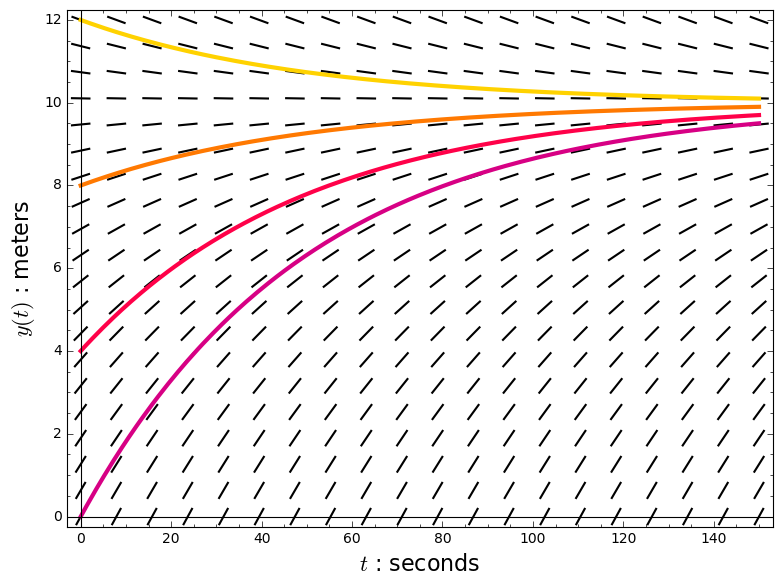

In [123]:
show(water_direction + sum(water_solutions), axes_labels = water_labels)

## Wearing out truck tires

### Scenario

You order a batch of new tires for a very large fleet of trucks. You want to know $n(t)$, the number of tires that are still intact after $t$ distance units of driving.

### Example model

$$n' = -5t^4 n$$

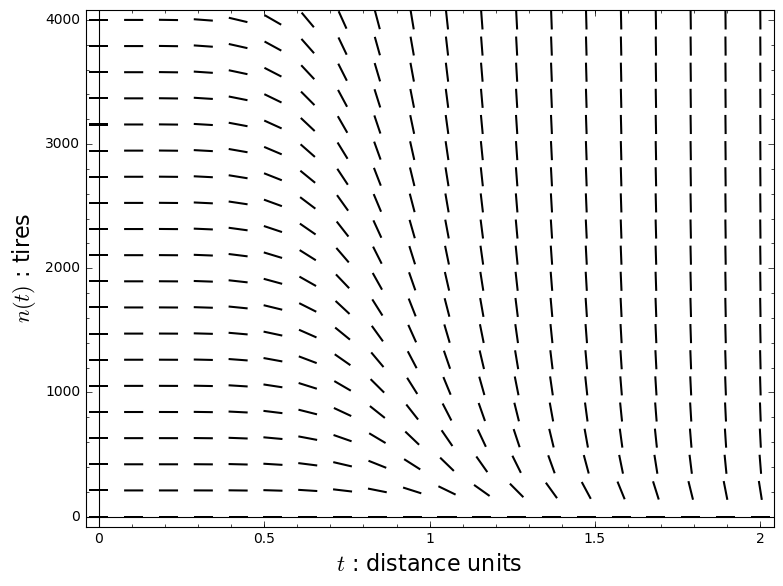

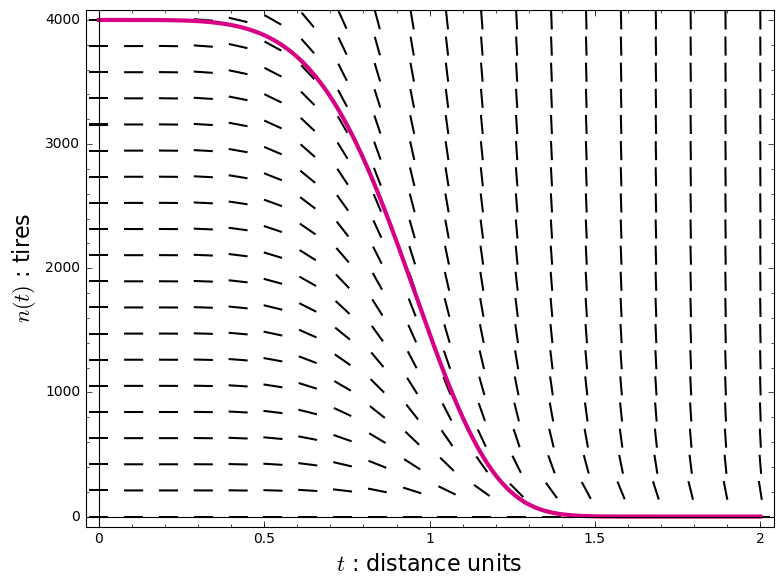

In [2]:
tires_direction = plot_slope_field(-5*t^4 * n, (t, 0, 2), (n, 0, 4000))
tires_solutions = [plot(1000*(4-k) * exp(-t^5), (t, 0, 2), thickness = 3, rgbcolor = palette[k]) for k in range(4)]
tires_labels = ["$t$ : distance units", "$n(t)$ : tires"]
show(tires_direction, axes_labels = tires_labels)
show(tires_direction + tires_solutions[0], axes_labels = tires_labels)

### Other initial numbers of tires

What if you start out with fewer tires?

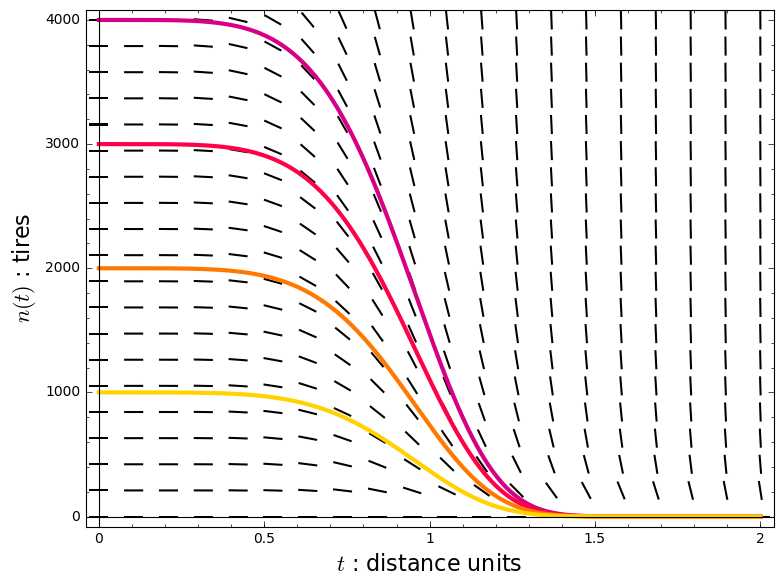

In [3]:
show(tires_direction + sum(tires_solutions), axes_labels = tires_labels)

## Swinging a pendulum

### Scenario

You attach a heavy weight to the ceiling using a light string. You pull the weight 60&deg; back from vertical, keeping the string taut, and let it go. You want to know $\theta(t)$, the angle of the string after $t$ seconds of swinging.

### Example model

$$\theta'' = -\sin \theta$$

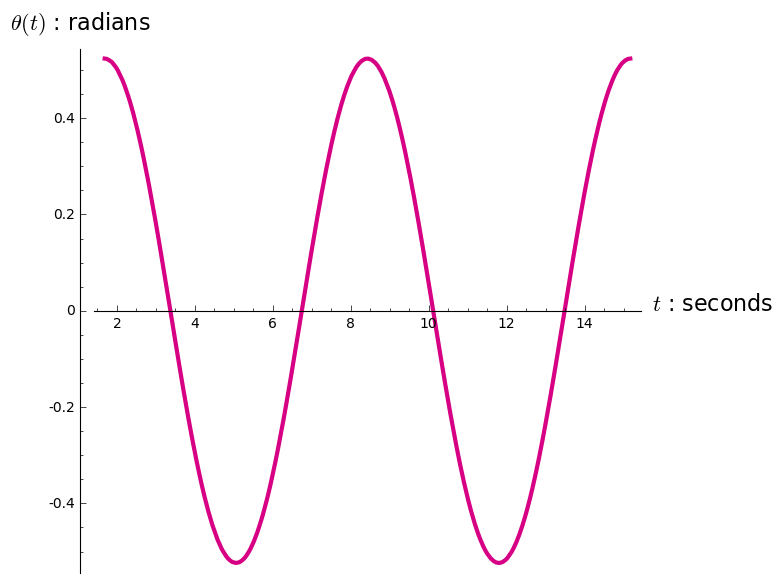

In [114]:
energies = [1 - cos(k*pi/12) for k in reversed(range(1,5))]
pendulum_solutions = [plot(asin(sqrt(en/2) * jacobi_sn(t, en/2)), (t, elliptic_kc(en/2), 9*elliptic_kc(en/2)), thickness = 3, rgbcolor = color) for (en, color) in zip(energies, palette)]
pendulum_labels = ["$t$ : seconds", "$\\theta(t)$ : radians"]
show(pendulum_solutions[0], axes_labels = pendulum_labels)

### Other initial angles

What if you let the weight fall from a smaller angle?

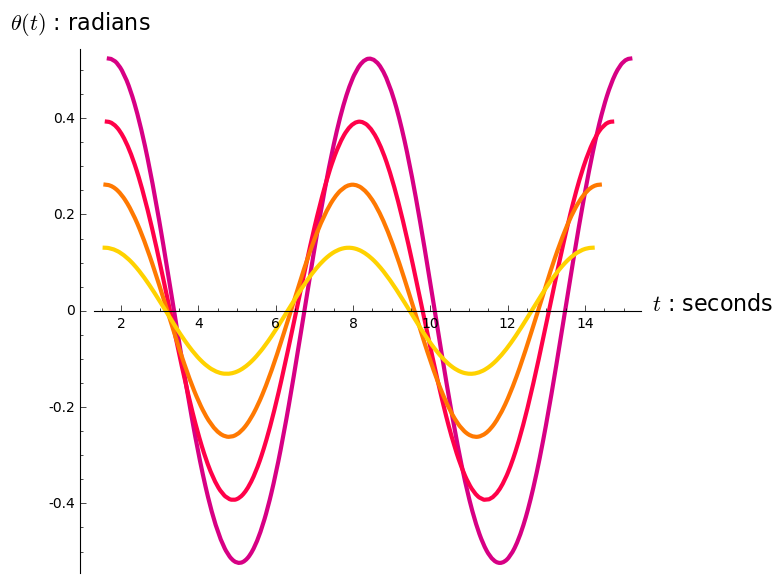

In [115]:
show(sum(pendulum_solutions), axes_labels = pendulum_labels)

## Administering an antibiotic by IV

### Scenario

You're giving a hospital patient an antibiotic through an IV line. You want to know $x(t)$, the amount of antibiotic in the patient's blood $t$ minutes after you start the IV drip. The IV adds antibiotic at a constant rate. As the antibiotic builds up, the rate at which the patient's kidneys remove it grows proportionally.

### Example model

$$x' = \tfrac{1}{5} - \tfrac{1}{50} x$$

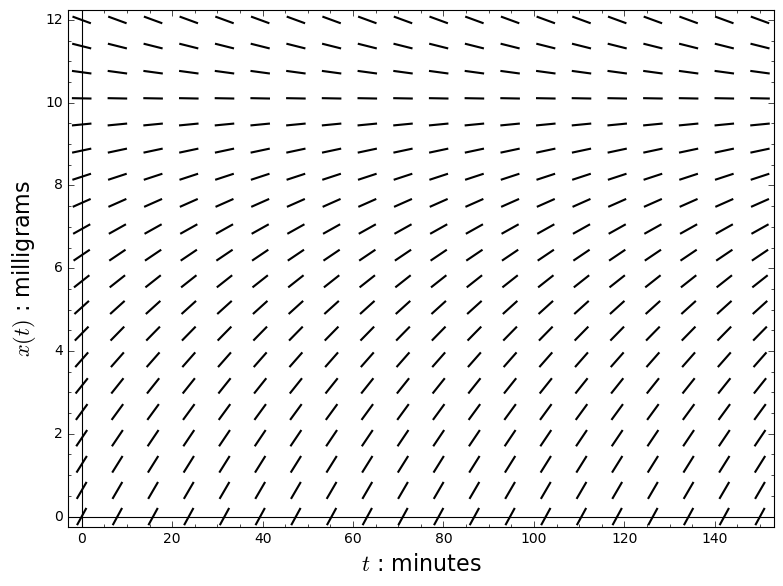

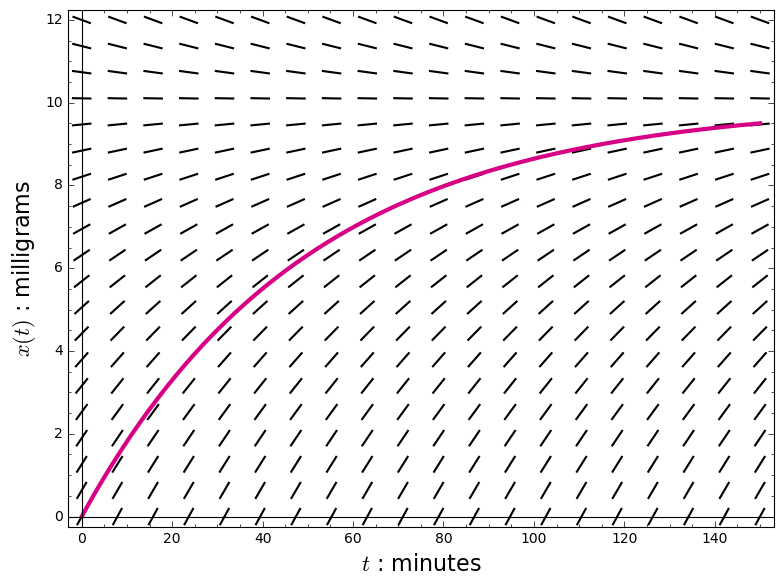

In [3]:
antibiotic_direction = plot_slope_field(1/5 - (1/50)*x, (t, 0, 150), (x, 0, 12))
antibiotic_solution = plot(10 * (1 - exp(-t/50)), (t, 0, 150), thickness = 3, rgbcolor = palette[0])
antibiotic_labels = ["$t$ : minutes", "$x(t)$ : milligrams"]
show(antibiotic_direction, axes_labels = antibiotic_labels)
show(antibiotic_direction + antibiotic_solution, axes_labels = antibiotic_labels)

## Administering an antibiotic by pill

### Scenario

After coming home from the hospital, the patient from earlier takes an antibiotic pill, which dissolves almost instantly in their intestines. Their blood absorbes the antibiotic from their intestines, and their kidneys remove the antibiotic from their blood. The absorption rate is proportional to the amount of antibiotic in their intestines, and the removal rate is proportional to the amount of antibiotic in their blood. At $t$ minutes after the pill dissolves, you want to know $w(t)$, the amount of antibiotic in the patient's intestines, and $x(t)$, the amount of antibiotic in the patient's blood.

### Example model

$$\begin{align*}
w' & = -\tfrac{1}{60} w \\
x' & = \phantom{-}\tfrac{1}{60} w - \tfrac{1}{50} x
\end{align*}$$

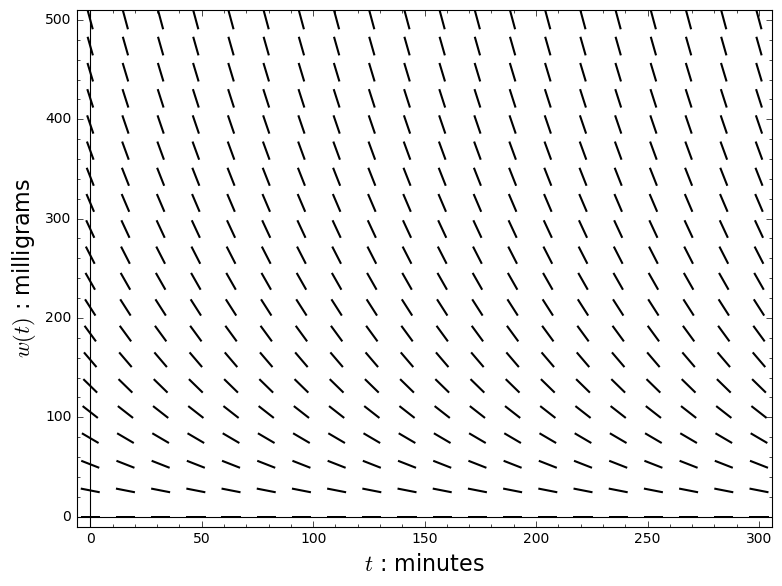

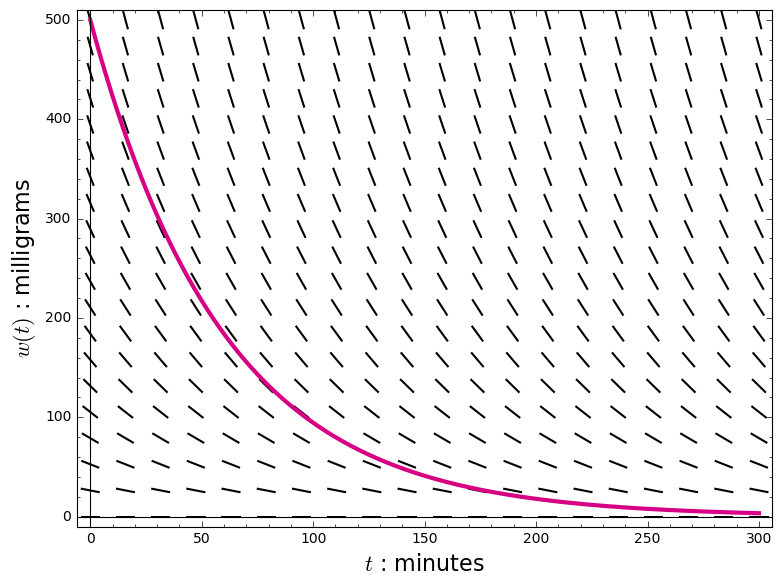

In [8]:
intestines_direction = plot_slope_field(-(1/60)*w, (t, 0, 300), (w, 0, 500))
intestines_solution = plot(500*exp(-t/60), (t, 0, 300), thickness = 3, rgbcolor = palette[0])
intestines_labels = ["$t$ : minutes", "$w(t)$ : milligrams"]
show(intestines_direction, axes_labels = intestines_labels)
show(intestines_direction + intestines_solution, axes_labels = intestines_labels)

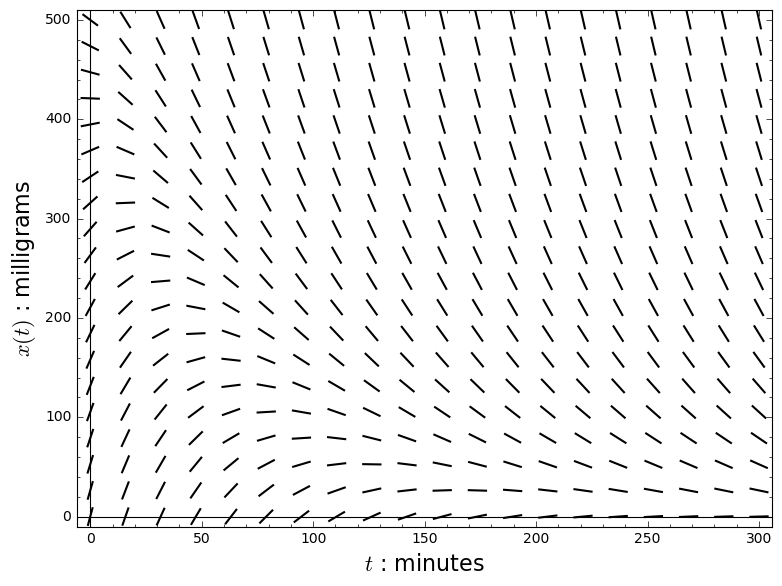

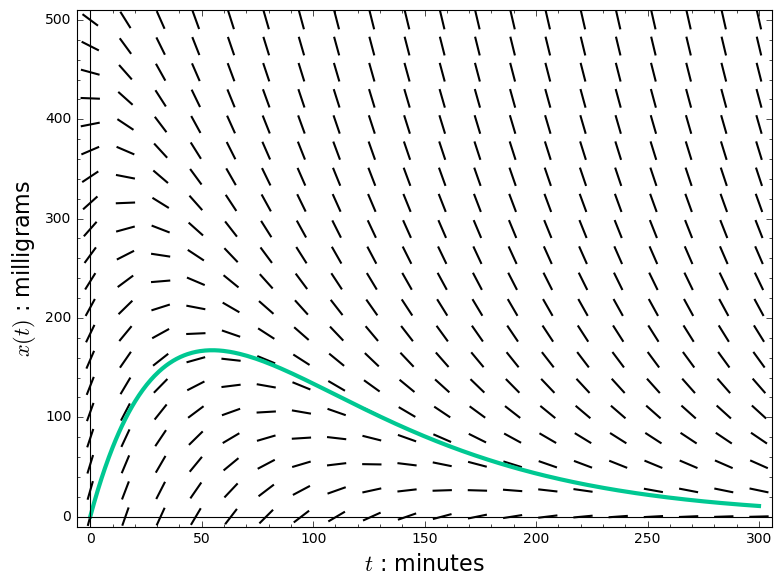

In [167]:
blood_direction = plot_slope_field((1/60)*500*exp(-t/60) - (1/50)*x, (t, 0, 300), (x, 0, 500))
blood_solution = plot((1 / (6/5 - 1))*500*(exp(-t/60) - exp(-t/50)), (t, 0, 300), thickness = 3, rgbcolor = cool_palette[1])
blood_labels = ["$t$ : minutes", "$x(t)$ : milligrams"]
show(blood_direction, axes_labels = blood_labels)
show(blood_direction + blood_solution, axes_labels = blood_labels)